## Usecase/Requirement:
Create different customer groups on basis of Age,Income,Spending

## Data Gathering

In [3]:
# To ignore non-harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform Basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## EDA: TO understand the data better
EDA=> correlations, patterns in data

## There are no missing values nor any duplicated data
## Determine X => which contains features to be grouped
X => Age, Income and Spending

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
X = df.drop(columns=['CustomerID','Gender'])
X.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [11]:
# changing column name
X.columns = ['Age','Income','Spending']

In [12]:
X.columns

Index(['Age', 'Income', 'Spending'], dtype='object')

In [13]:
# to add a new column
#X['new_col_name']= list/array of data

## Data Preprocessing and Data Cleaning

In [14]:
import os
os.chdir(r'C:\Machine Learning1418\repository\Algorithm Evaluation')

In [15]:
from data_clean_preprocess import clean_process_CON_data

In [16]:
con_pipe,X_pre = clean_process_CON_data(X)

In [17]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [18]:
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [19]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### restart the kernel once installation done

## Model Building using Elbow method

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

  File "c:\Users\Akshay\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Akshay\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Akshay\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Akshay\anaconda3\Lib\subproc

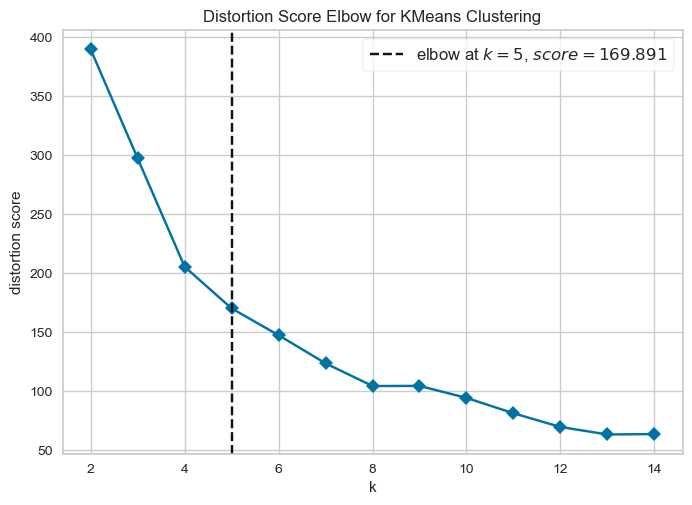

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
visualizer.show()

## From above figure, k=7 is the best cluster possibility.
## Final Model Buidling

In [22]:
best_kmeans = KMeans(n_clusters=7)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([6, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 1, 6, 3, 0,
       3, 6, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 5, 2, 5, 2, 5, 2,
       0, 2, 4, 2, 5, 2, 4, 2, 5, 2, 0, 2, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2,
       5, 2, 4, 2, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2, 5, 2,
       5, 2, 5, 2, 4, 2, 5, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [23]:
# centroids of all the clusters
best_kmeans.cluster_centers_

array([[-0.85043527, -0.14894113, -0.04147777],
       [ 1.25526464, -0.26166879, -0.03158663],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.47895722, -1.30822992, -1.19644353],
       [-0.35604252,  1.28910885, -1.32985413],
       [ 0.79597702,  0.80937152, -1.2226508 ],
       [-0.99396865, -1.34734766,  1.06404834]])

In [24]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [25]:
clusters

array([6, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 1, 6, 3, 0,
       3, 6, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 5, 2, 5, 2, 5, 2,
       0, 2, 4, 2, 5, 2, 4, 2, 5, 2, 0, 2, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2,
       5, 2, 4, 2, 4, 2, 5, 2, 4, 2, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2, 5, 2,
       5, 2, 5, 2, 4, 2, 5, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [26]:
X['Groups'] = clusters

In [27]:
X.head()

,Age,Income,Spending,Groups
0,19,15,39,6
1,21,15,81,6
2,20,16,6,3
3,23,16,77,6
4,31,17,40,3


In [28]:
X['Groups']==0

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Groups, Length: 200, dtype: bool

In [29]:
X[X['Groups']==0]

,Age,Income,Spending,Groups
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0


In [30]:
len(X[X['Groups']==0])

38

In [31]:
for i in range(6):
    print(f'Cluster {i}')
    display(X[X['Groups']==i])
    print("=================")

Cluster 0


,Age,Income,Spending,Groups
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0


Cluster 1


,Age,Income,Spending,Groups
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


Cluster 2


,Age,Income,Spending,Groups
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2


Cluster 3


,Age,Income,Spending,Groups
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
8,64,19,3,3
10,67,19,14,3
12,58,20,15,3
14,37,20,13,3
16,35,21,35,3
18,52,23,29,3
20,35,24,35,3


Cluster 4


,Age,Income,Spending,Groups
134,20,73,5,4
138,19,74,10,4
144,25,77,12,4
148,34,78,22,4
156,37,78,1,4
158,34,78,1,4
162,19,81,5,4
168,36,87,27,4
170,40,87,13,4
172,36,87,10,4


Cluster 5


,Age,Income,Spending,Groups
126,43,71,35,5
128,59,71,11,5
130,47,71,9,5
136,44,73,7,5
140,57,75,5,5
146,48,77,36,5
150,43,78,17,5
152,44,78,20,5
154,47,78,16,5
160,56,79,35,5


In [32]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
X1 = df.drop(columns='CustomerID')
X1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Clusters - Visualization

In [34]:
X.columns

Index(['Age', 'Income', 'Spending', 'Groups'], dtype='object')

In [35]:
import plotly.express as ex
fig = ex.scatter_3d(data_frame=X,x='Age',y='Income',z='Spending',color='Groups')
fig.show()

In [36]:
X1.columns = ['Gender','Age','Income','Spending']
X1.head()

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [37]:
cat = list(X1.columns[X1.dtypes=='object'])
con = list(X1.columns[X1.dtypes!='object'])

In [38]:
from data_clean_preprocess import clean_process_data
num_pipe2, X1_pre = clean_process_data(cat,con,X1)
X1_pre.head()

,cat__Gender_Female,cat__Gender_Male,con__Age,con__Income,con__Spending
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980


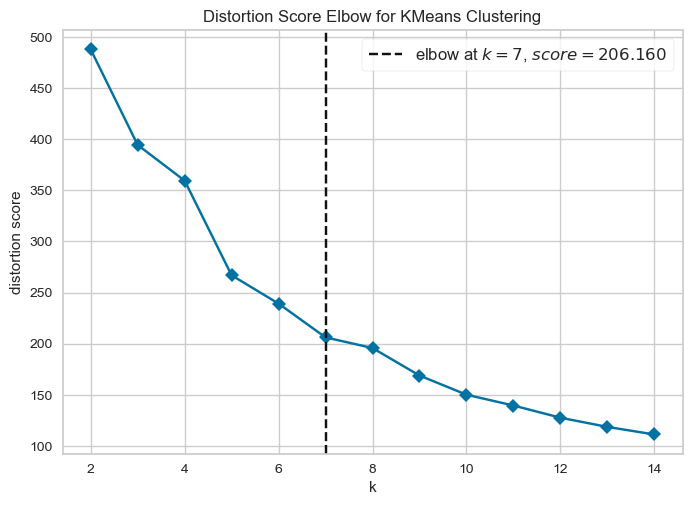

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
visualizer2 = kelbow_visualizer(base_model,X1_pre,k=(2,15),timings=False)
visualizer2.show()

## Inertia

In [40]:
best_kmeans.inertia_

120.65701717382017

In [44]:
best_kmeans2.inertia_

272.5347011306673

## From above figure, k=5 clusters provides best grouping of data.
## Final model building

In [43]:
best_kmeans2 = KMeans(5)
clusters2 = best_kmeans2.fit_predict(X1_pre)
clusters2

array([1, 1, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 1, 4, 1, 3, 4, 1, 1,
       3, 1, 3, 1, 3, 1, 4, 4, 3, 4, 3, 1, 3, 4, 3, 4, 4, 4, 3, 1, 3, 4,
       3, 4, 3, 4, 4, 4, 3, 1, 4, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3, 1,
       4, 3, 1, 4, 3, 3, 3, 3, 3, 1, 3, 1, 4, 3, 3, 1, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 1, 3, 4, 4, 1, 3, 4, 3, 1, 4, 3, 3, 1, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 1, 4, 4, 3, 3, 3, 3, 1, 4, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [45]:
X1['Groups'] = clusters2
X1.head()

,Gender,Age,Income,Spending,Groups
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [46]:
for i in range(5):
    print(f'Cluster {i}')
    display(X1[X1['Groups']==i])
    print('================')

Cluster 0


,Gender,Age,Income,Spending,Groups
123,Male,39,69,91,0
125,Female,31,70,77,0
127,Male,40,71,95,0
129,Male,38,71,75,0
131,Male,39,71,75,0
133,Female,31,72,71,0
135,Female,29,73,88,0
137,Male,32,73,73,0
139,Female,35,74,72,0
141,Male,32,75,93,0


Cluster 1


,Gender,Age,Income,Spending,Groups
0,Male,19,15,39,1
1,Male,21,15,81,1
15,Male,22,20,79,1
17,Male,20,21,66,1
20,Male,35,24,35,1
21,Male,25,24,73,1
23,Male,31,25,73,1
25,Male,29,28,82,1
27,Male,35,28,61,1
33,Male,18,33,92,1


Cluster 2


,Gender,Age,Income,Spending,Groups
126,Male,43,71,35,2
128,Male,59,71,11,2
130,Male,47,71,9,2
134,Male,20,73,5,2
136,Female,44,73,7,2
138,Male,19,74,10,2
140,Female,57,75,5,2
144,Male,25,77,12,2
146,Male,48,77,36,2
148,Female,34,78,22,2


Cluster 3


,Gender,Age,Income,Spending,Groups
8,Male,64,19,3,3
10,Male,67,19,14,3
12,Female,58,20,15,3
14,Male,37,20,13,3
18,Male,52,23,29,3
22,Female,46,25,5,3
24,Female,54,28,14,3
26,Female,45,28,32,3
30,Male,60,30,4,3
32,Male,53,33,4,3


Cluster 4


,Gender,Age,Income,Spending,Groups
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4
5,Female,22,17,76,4
6,Female,35,18,6,4
7,Female,23,18,94,4
9,Female,30,19,72,4
11,Female,35,19,99,4
13,Female,24,20,77,4
16,Female,35,21,35,4


In [53]:
os.chdir(r'C:\Machine Learning1418\repository\KMeans Clustering')

In [49]:
X.to_csv('Age_Income_Spending-Clusters.csv',index=False)

In [50]:
X1.to_csv('GenderAgeIncomeSpending-Clusters.csv',index=False)